<a href="https://colab.research.google.com/github/brandonkeung/Poker-Hand-Identification/blob/main/Poker_Hand_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


# Neural Net


In [74]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()

In [75]:
train_df = pd.read_csv('poker-hand-training-true.data')
test_df = pd.read_csv('poker-hand-testing.data')

In [76]:
cols = ["S1","R1","S2","R2","S3","R3","S4","R4","S5","R5","Poker Hand"]
train_df.columns = cols
test_df.columns = cols

In [77]:
train_df.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Poker Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [78]:
test_df.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Poker Hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [79]:
train, valid = np.split(train_df.sample(frac=1), [int(0.8*len(train_df))])
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values
X_valid = valid[valid.columns[:-1]].values
y_valid = valid[valid.columns[-1]].values
X_test = test_df[test_df.columns[:-1]].values
y_test = test_df[test_df.columns[-1]].values
# one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [80]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
  
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='categorical_crossentropy',
                    metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


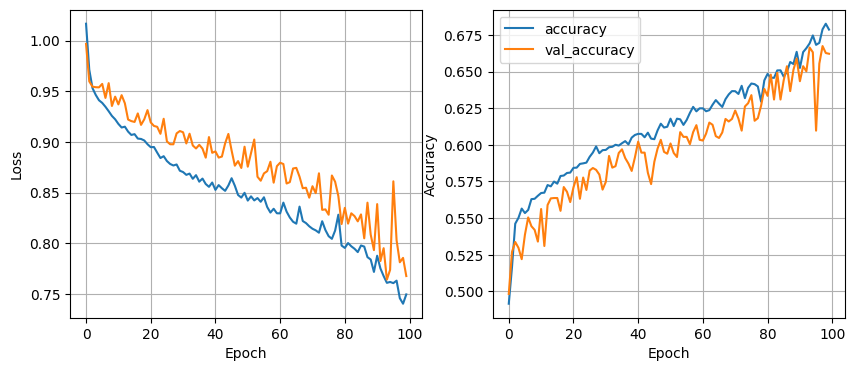

157/157 [==============================] - 0s 1ms/step - loss: 0.7731 - accuracy: 0.6565
16 nodes, dropout 0, lr 0.01, batch size 64


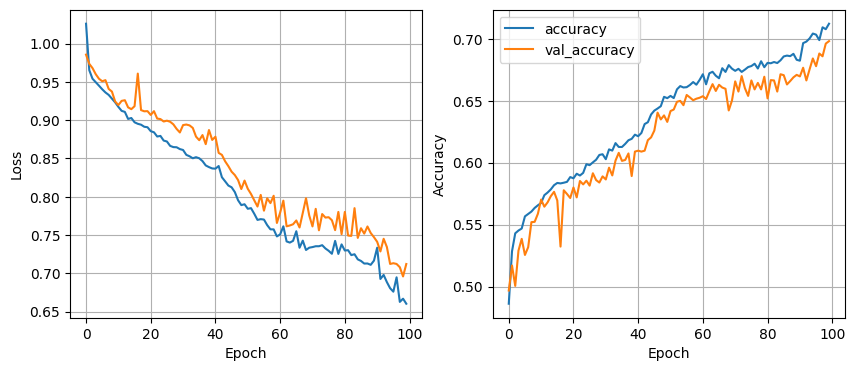

157/157 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.6997
16 nodes, dropout 0, lr 0.01, batch size 128


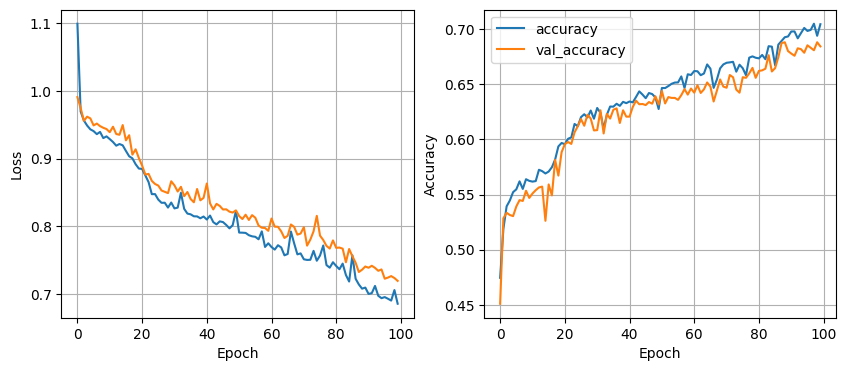

157/157 [==============================] - 0s 2ms/step - loss: 0.7277 - accuracy: 0.6941
16 nodes, dropout 0, lr 0.005, batch size 32


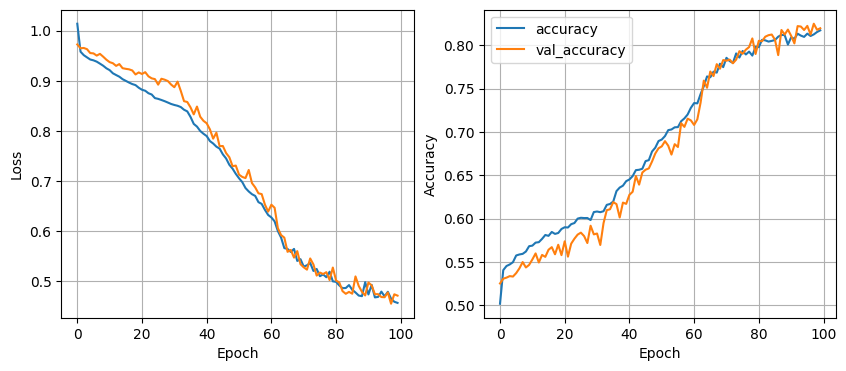

157/157 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7971
16 nodes, dropout 0, lr 0.005, batch size 64


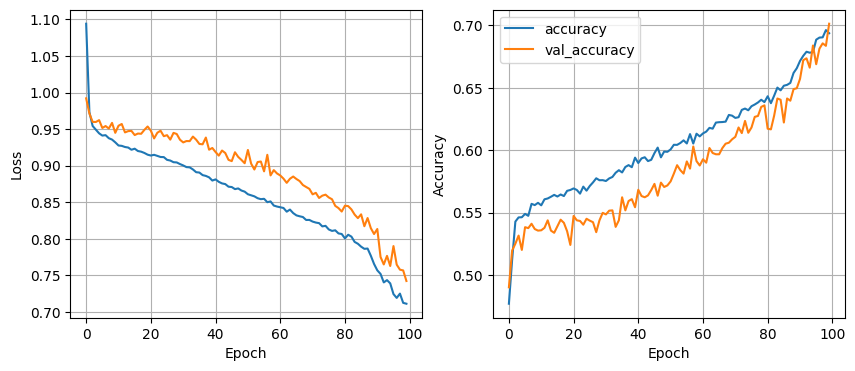

157/157 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.6953
16 nodes, dropout 0, lr 0.005, batch size 128


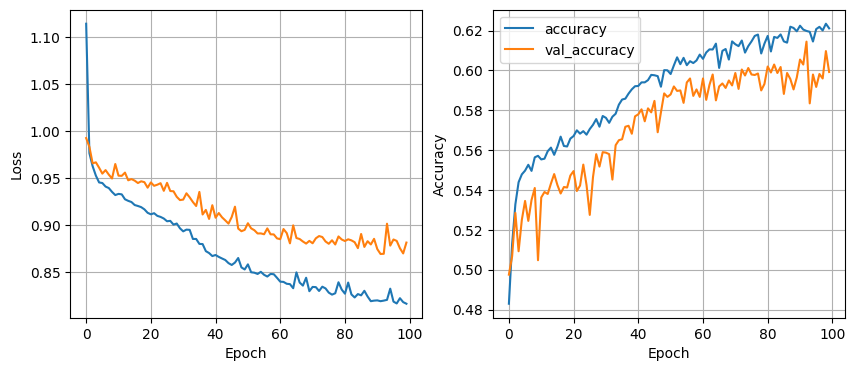

157/157 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.6006
16 nodes, dropout 0, lr 0.001, batch size 32


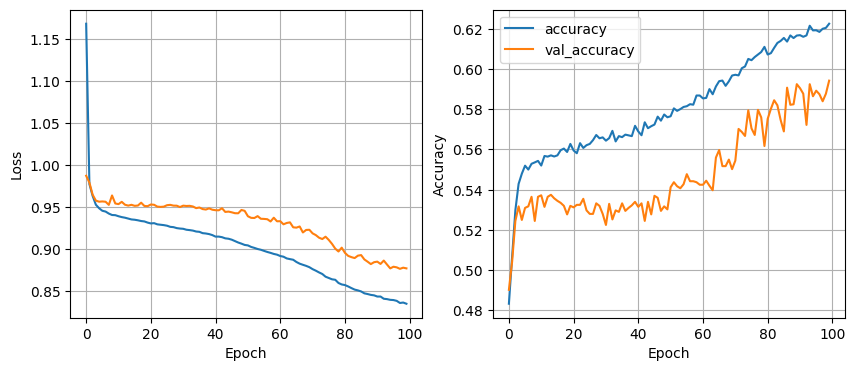

157/157 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.5944
16 nodes, dropout 0, lr 0.001, batch size 64


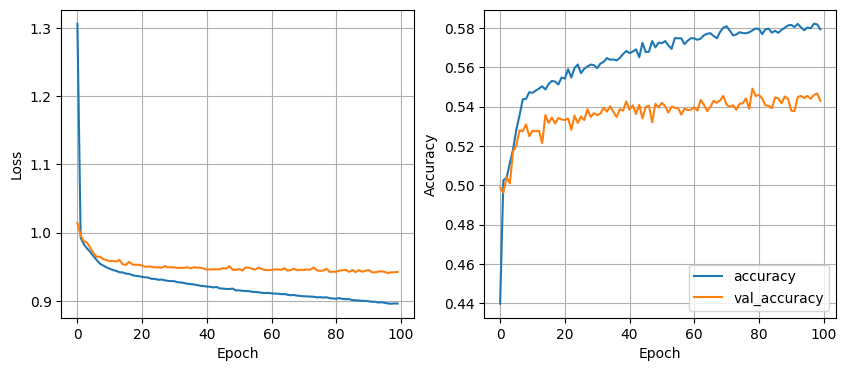

157/157 [==============================] - 0s 2ms/step - loss: 0.9522 - accuracy: 0.5518
16 nodes, dropout 0, lr 0.001, batch size 128


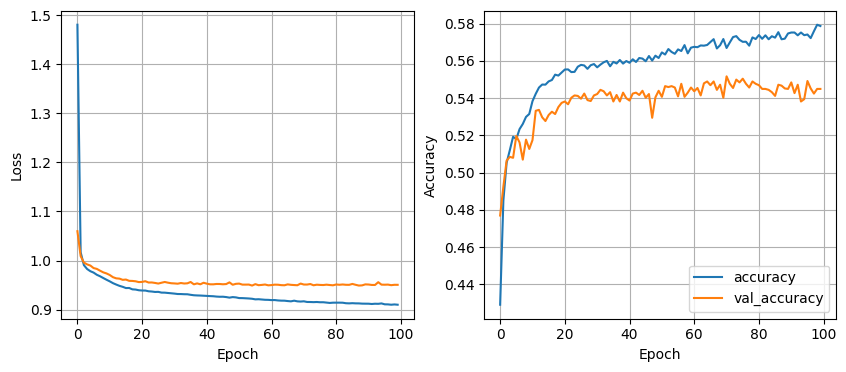

157/157 [==============================] - 0s 2ms/step - loss: 0.9652 - accuracy: 0.5450
16 nodes, dropout 0.2, lr 0.01, batch size 32


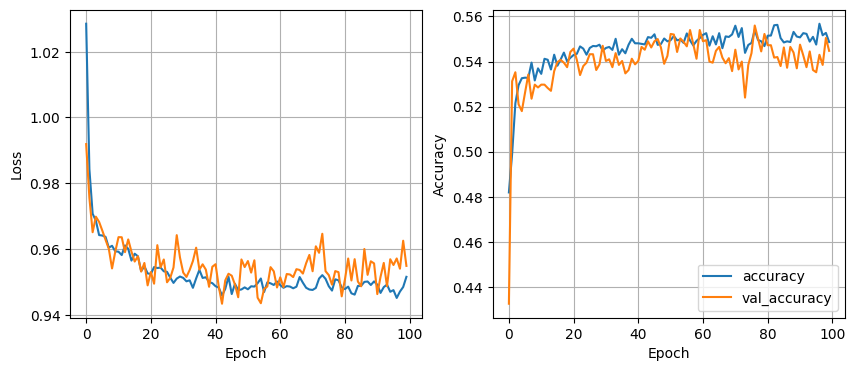

157/157 [==============================] - 0s 2ms/step - loss: 0.9585 - accuracy: 0.5468
16 nodes, dropout 0.2, lr 0.01, batch size 64


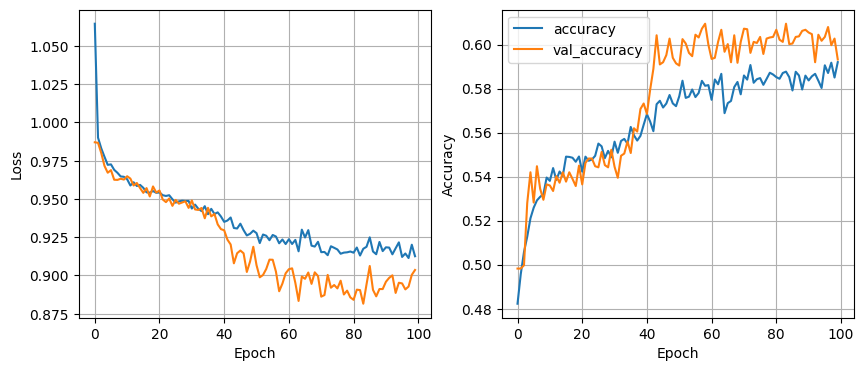

157/157 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.5958
16 nodes, dropout 0.2, lr 0.01, batch size 128


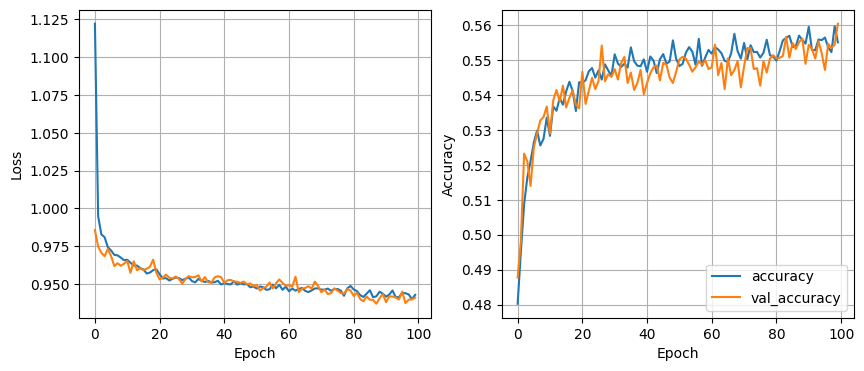

157/157 [==============================] - 0s 2ms/step - loss: 0.9512 - accuracy: 0.5508
16 nodes, dropout 0.2, lr 0.005, batch size 32


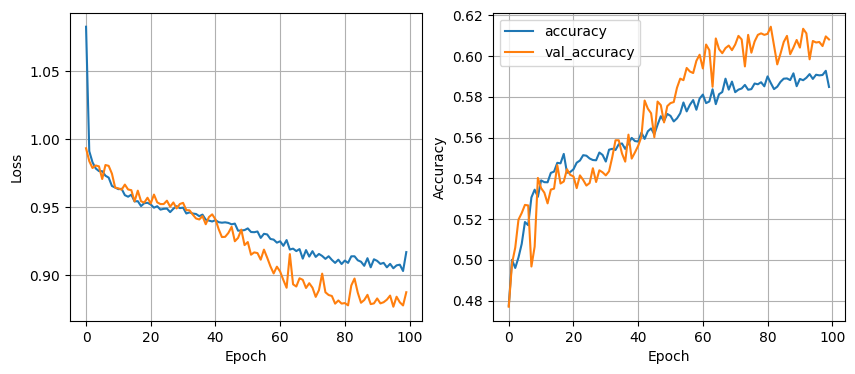

157/157 [==============================] - 0s 2ms/step - loss: 0.8932 - accuracy: 0.6136
16 nodes, dropout 0.2, lr 0.005, batch size 64


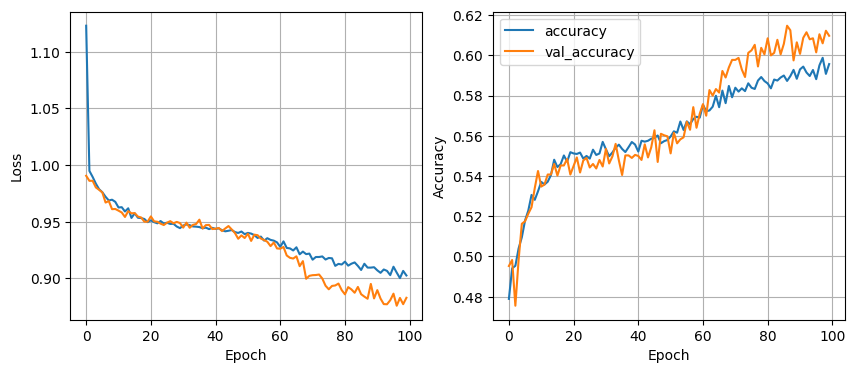

157/157 [==============================] - 0s 2ms/step - loss: 0.8871 - accuracy: 0.6066
16 nodes, dropout 0.2, lr 0.005, batch size 128


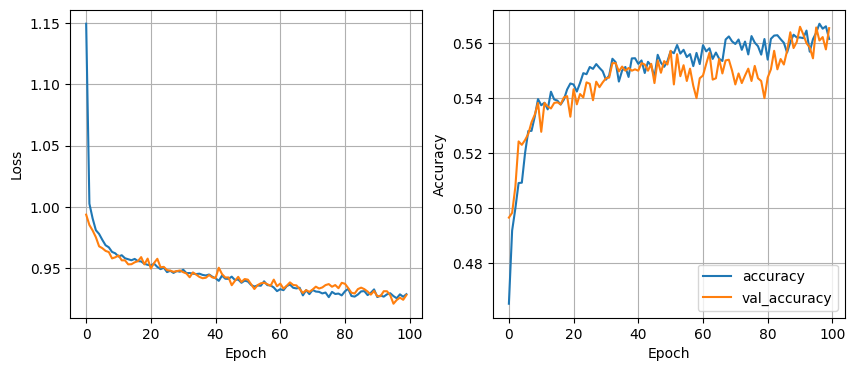

157/157 [==============================] - 0s 2ms/step - loss: 0.9324 - accuracy: 0.5616
16 nodes, dropout 0.2, lr 0.001, batch size 32


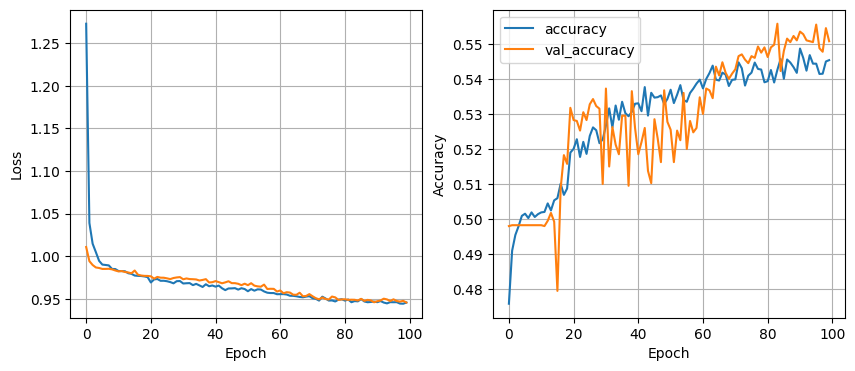

157/157 [==============================] - 0s 2ms/step - loss: 0.9567 - accuracy: 0.5388
16 nodes, dropout 0.2, lr 0.001, batch size 64


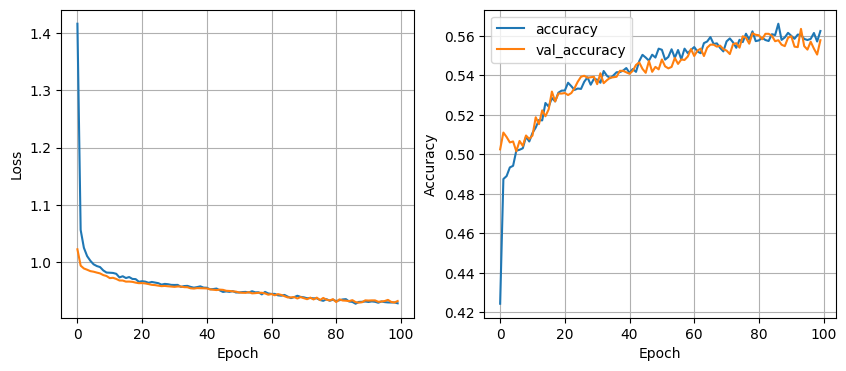

157/157 [==============================] - 0s 2ms/step - loss: 0.9435 - accuracy: 0.5570
16 nodes, dropout 0.2, lr 0.001, batch size 128


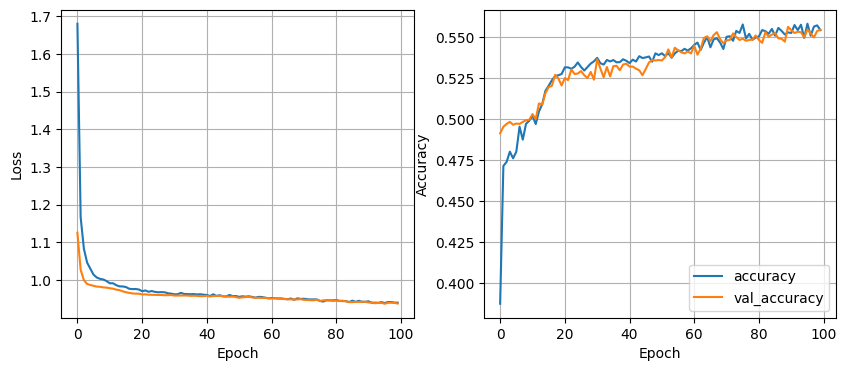

157/157 [==============================] - 0s 2ms/step - loss: 0.9446 - accuracy: 0.5636
32 nodes, dropout 0, lr 0.01, batch size 32


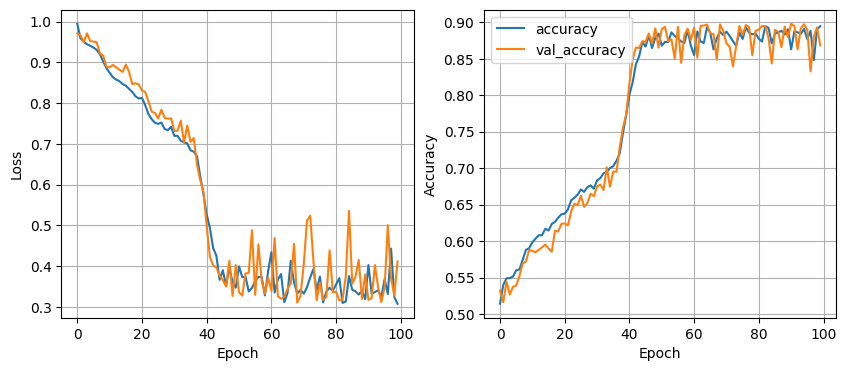

157/157 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8645
32 nodes, dropout 0, lr 0.01, batch size 64


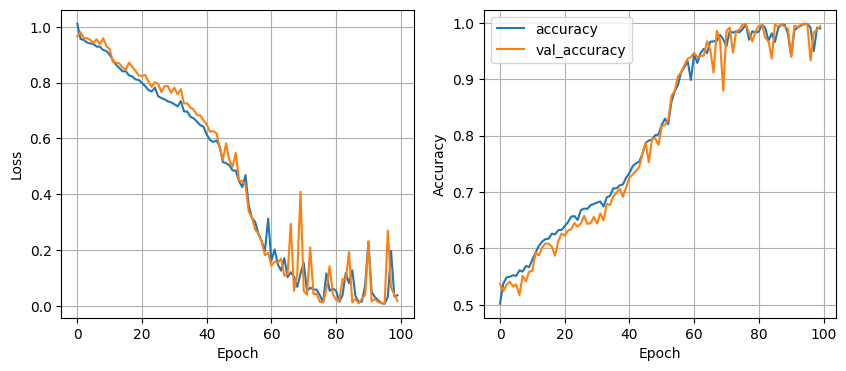

157/157 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9922
32 nodes, dropout 0, lr 0.01, batch size 128


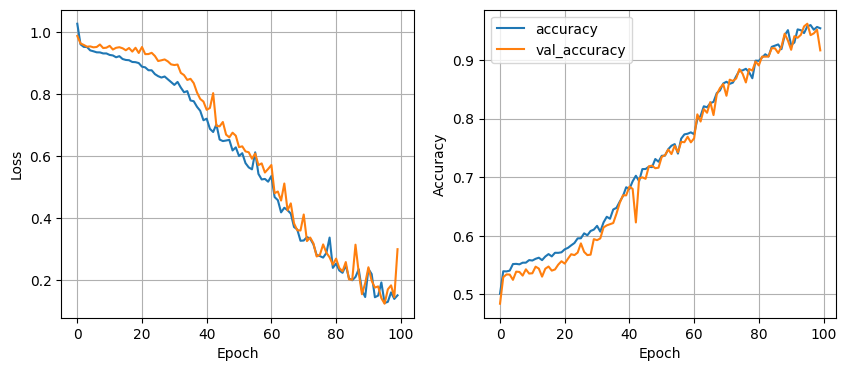

157/157 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.9128
32 nodes, dropout 0, lr 0.005, batch size 32


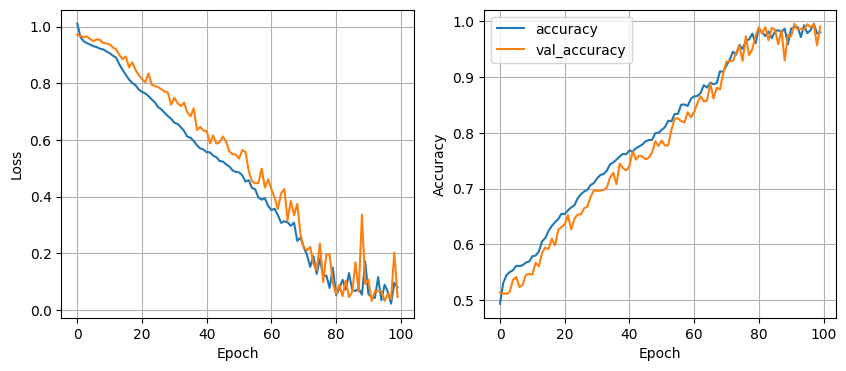

157/157 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9894
32 nodes, dropout 0, lr 0.005, batch size 64


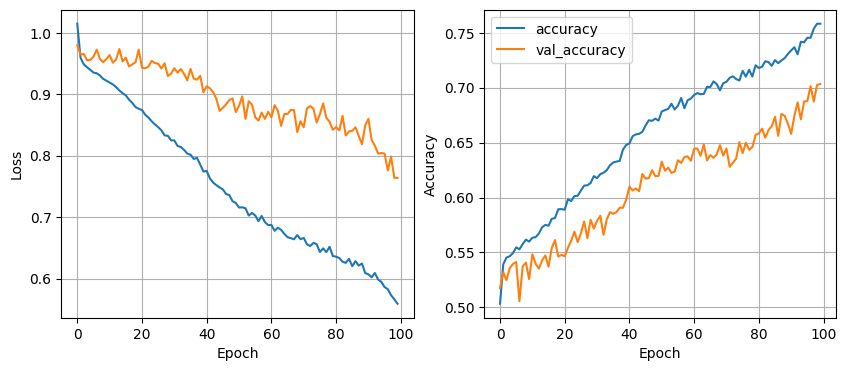

157/157 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.7165
32 nodes, dropout 0, lr 0.005, batch size 128


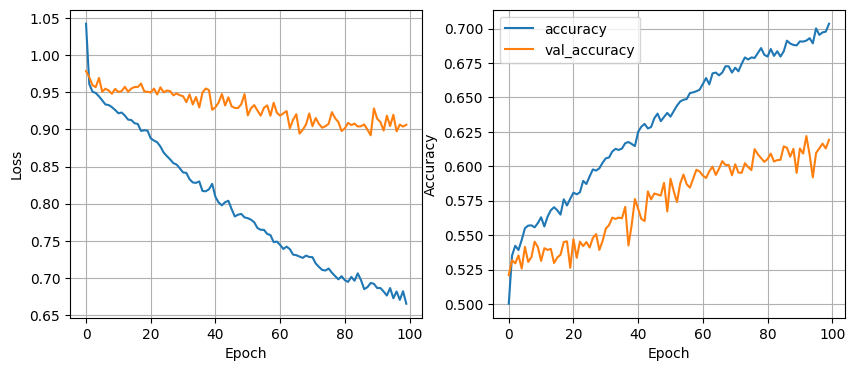

157/157 [==============================] - 0s 3ms/step - loss: 0.8923 - accuracy: 0.6244
32 nodes, dropout 0, lr 0.001, batch size 32


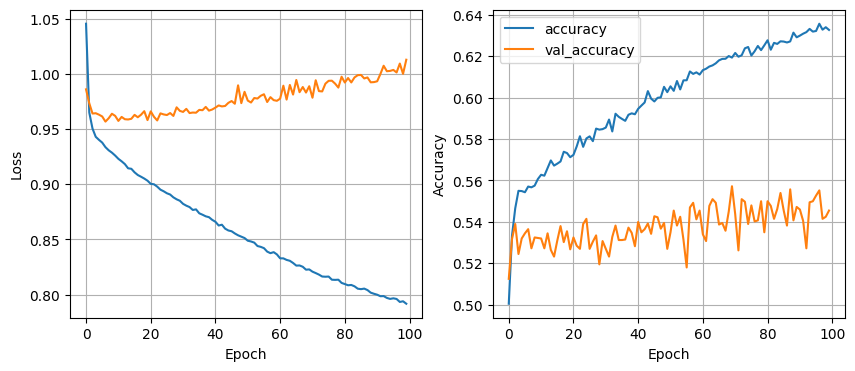

157/157 [==============================] - 0s 2ms/step - loss: 1.0189 - accuracy: 0.5518
32 nodes, dropout 0, lr 0.001, batch size 64


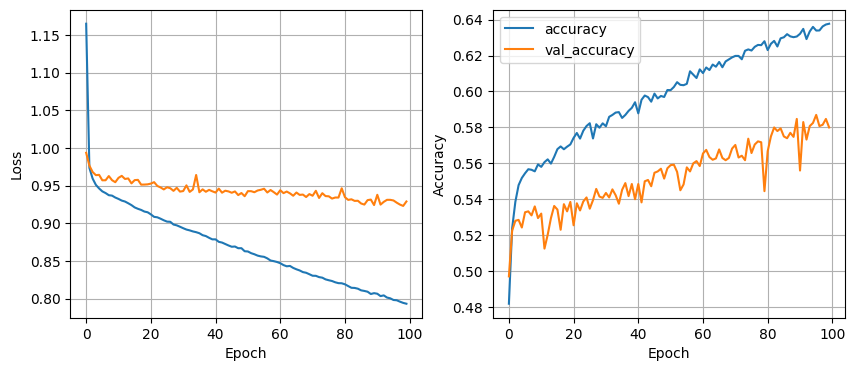

157/157 [==============================] - 0s 2ms/step - loss: 0.9358 - accuracy: 0.5832
32 nodes, dropout 0, lr 0.001, batch size 128


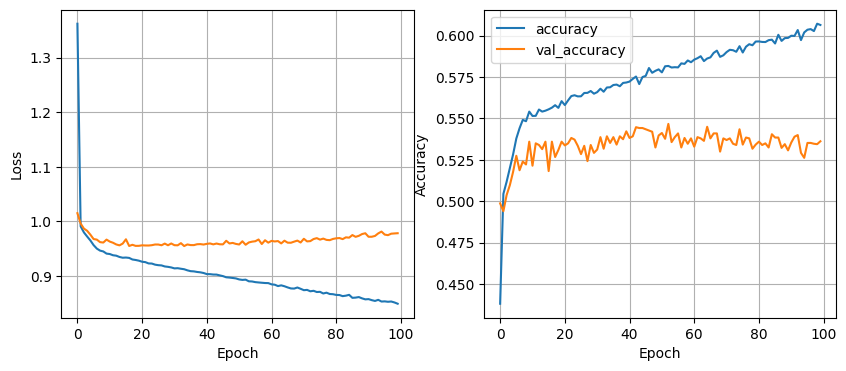

157/157 [==============================] - 0s 2ms/step - loss: 0.9738 - accuracy: 0.5410
32 nodes, dropout 0.2, lr 0.01, batch size 32


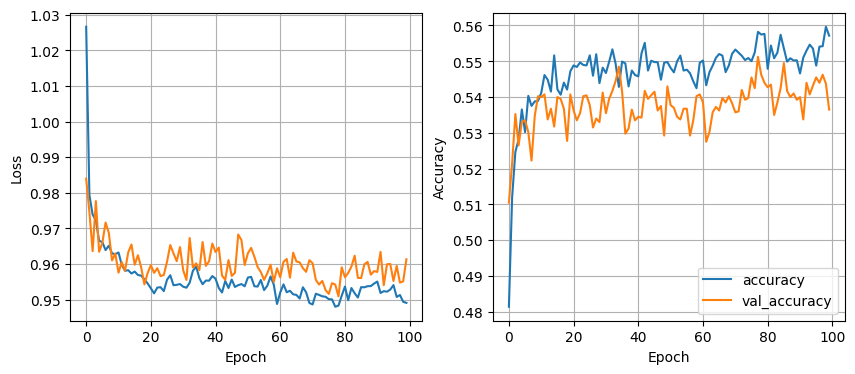

157/157 [==============================] - 0s 2ms/step - loss: 0.9662 - accuracy: 0.5410
32 nodes, dropout 0.2, lr 0.01, batch size 64


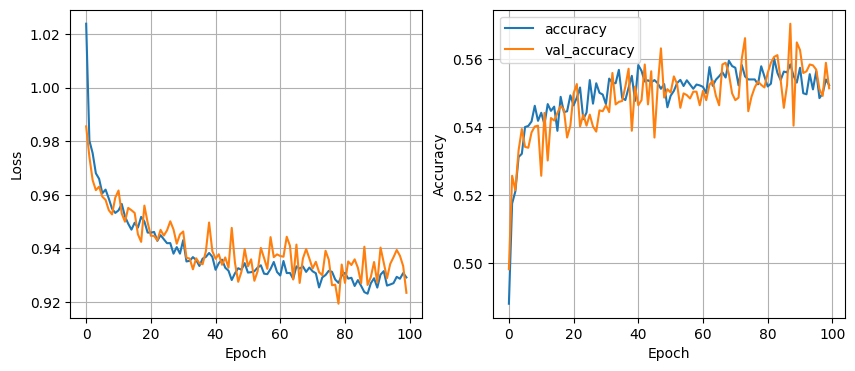

157/157 [==============================] - 0s 2ms/step - loss: 0.9390 - accuracy: 0.5532
32 nodes, dropout 0.2, lr 0.01, batch size 128


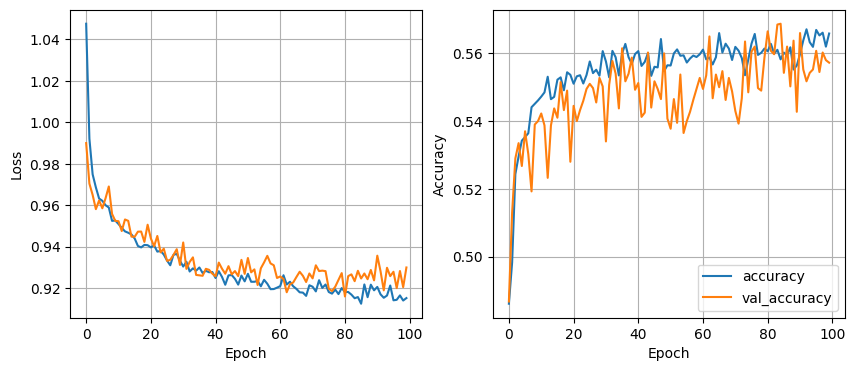

157/157 [==============================] - 0s 2ms/step - loss: 0.9340 - accuracy: 0.5520
32 nodes, dropout 0.2, lr 0.005, batch size 32


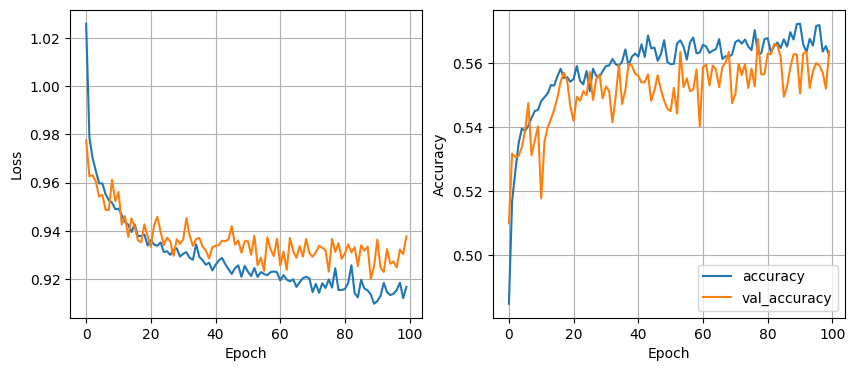

157/157 [==============================] - 0s 2ms/step - loss: 0.9352 - accuracy: 0.5606
32 nodes, dropout 0.2, lr 0.005, batch size 64


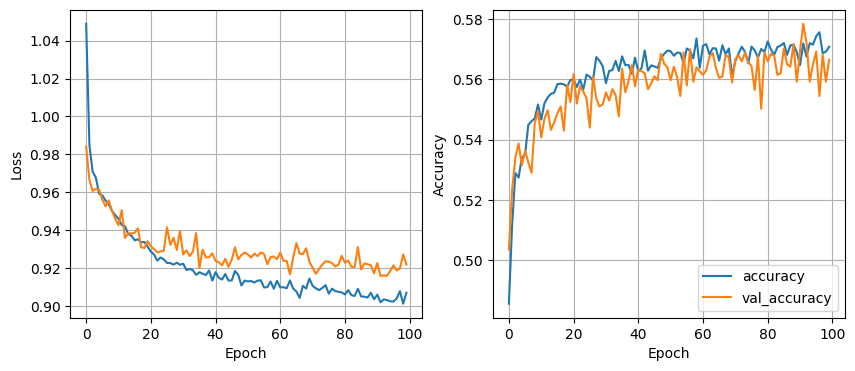

157/157 [==============================] - 1s 7ms/step - loss: 0.9298 - accuracy: 0.5600
32 nodes, dropout 0.2, lr 0.005, batch size 128


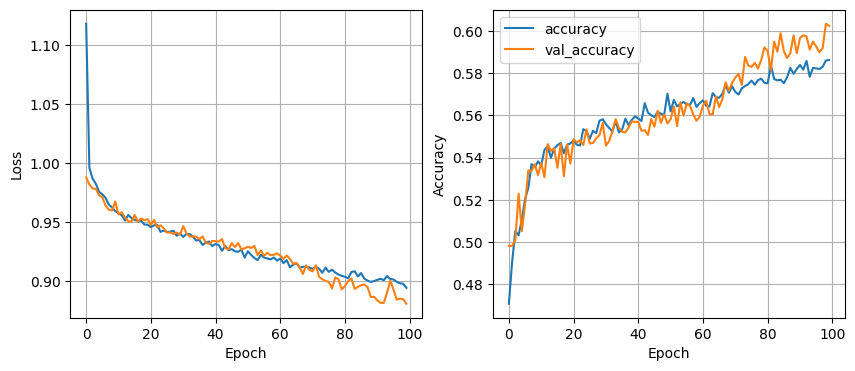

157/157 [==============================] - 0s 2ms/step - loss: 0.8955 - accuracy: 0.6000
32 nodes, dropout 0.2, lr 0.001, batch size 32


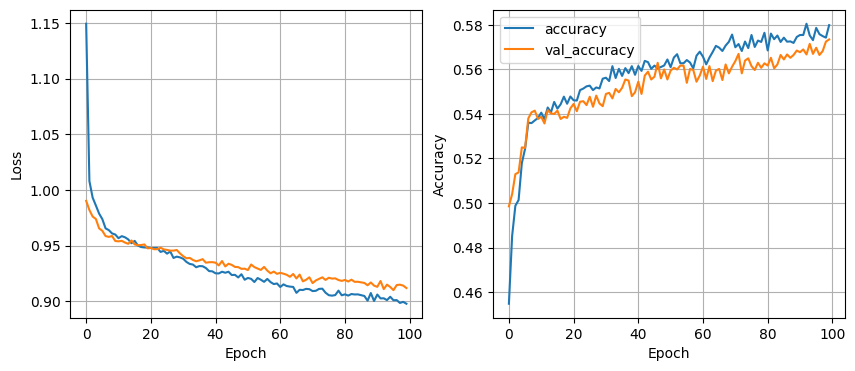

157/157 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.5664
32 nodes, dropout 0.2, lr 0.001, batch size 64


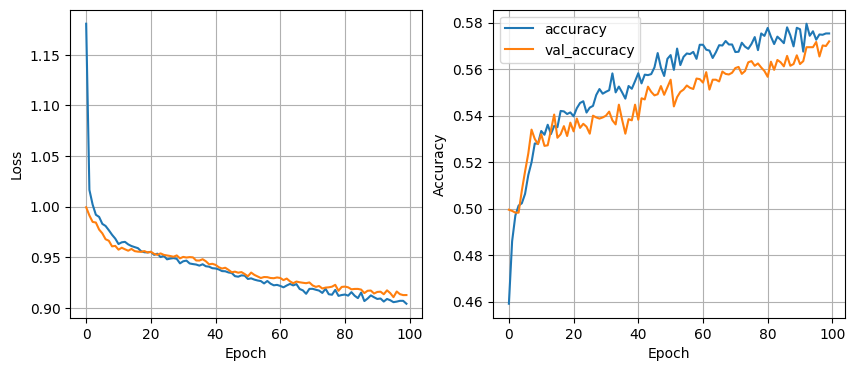

157/157 [==============================] - 0s 2ms/step - loss: 0.9172 - accuracy: 0.5720
32 nodes, dropout 0.2, lr 0.001, batch size 128


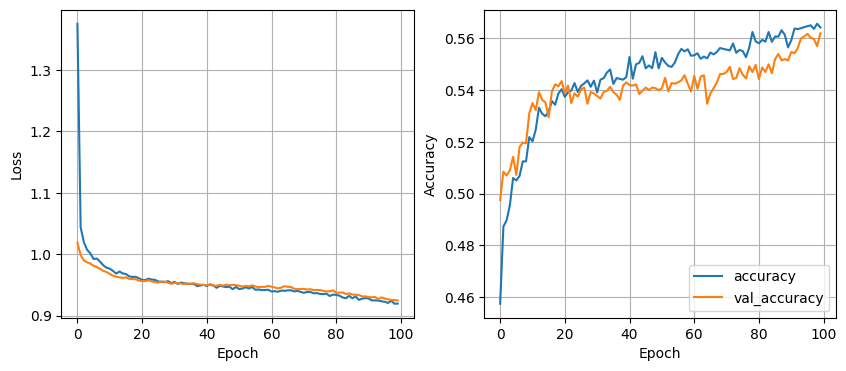

157/157 [==============================] - 0s 2ms/step - loss: 0.9333 - accuracy: 0.5612
64 nodes, dropout 0, lr 0.01, batch size 32


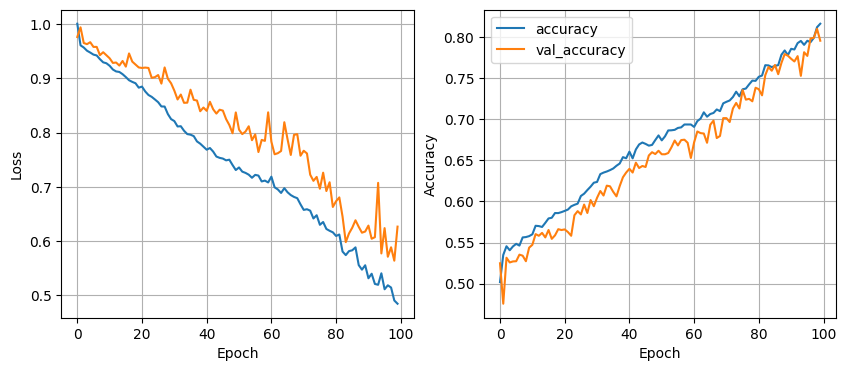

157/157 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7881
64 nodes, dropout 0, lr 0.01, batch size 64


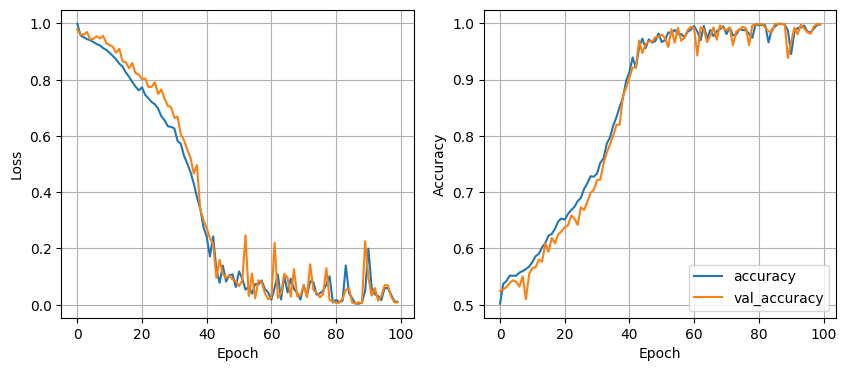

157/157 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9972
64 nodes, dropout 0, lr 0.01, batch size 128


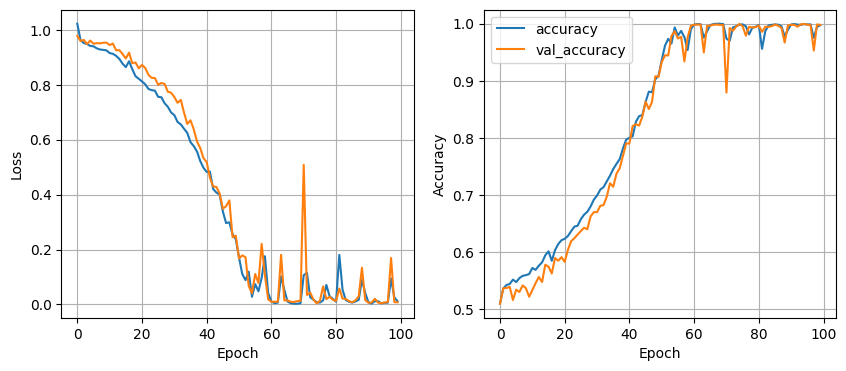

157/157 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9968
64 nodes, dropout 0, lr 0.005, batch size 32


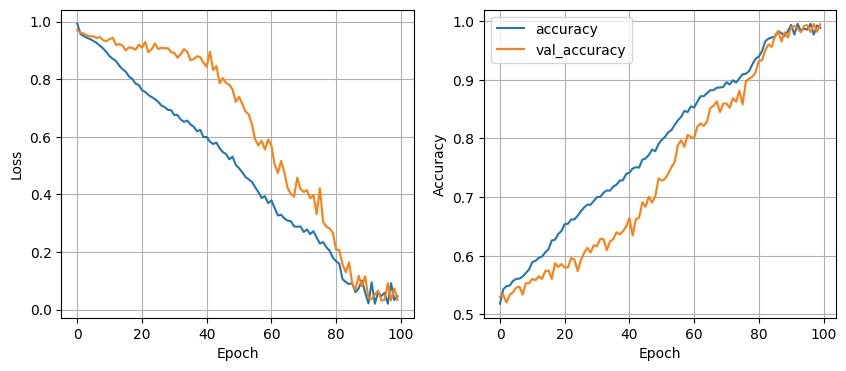

157/157 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9884
64 nodes, dropout 0, lr 0.005, batch size 64


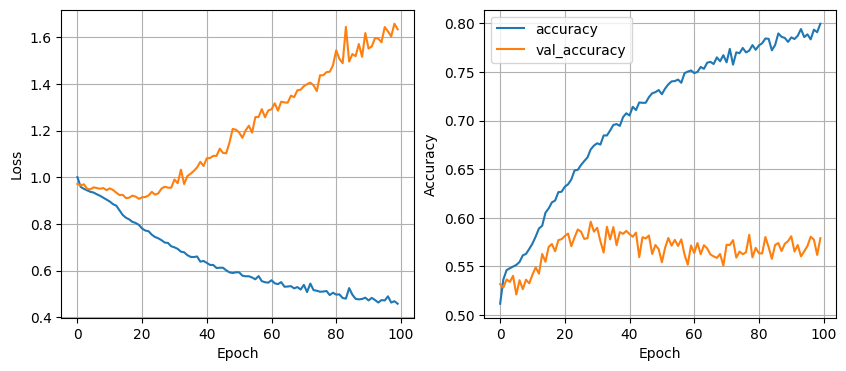

157/157 [==============================] - 0s 3ms/step - loss: 1.6264 - accuracy: 0.5748
64 nodes, dropout 0, lr 0.005, batch size 128


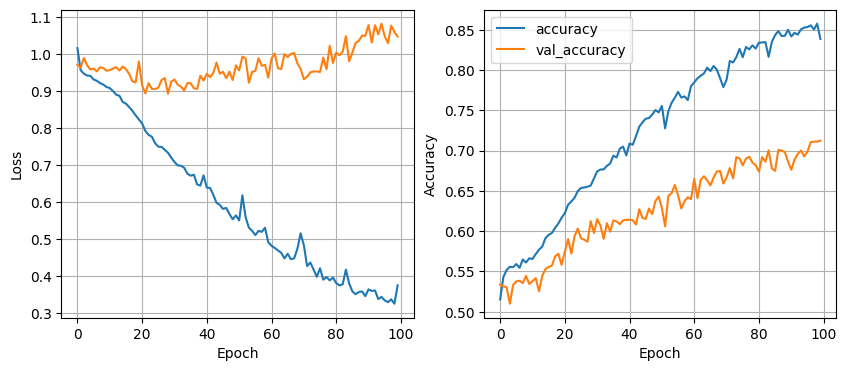

157/157 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.7017
64 nodes, dropout 0, lr 0.001, batch size 32


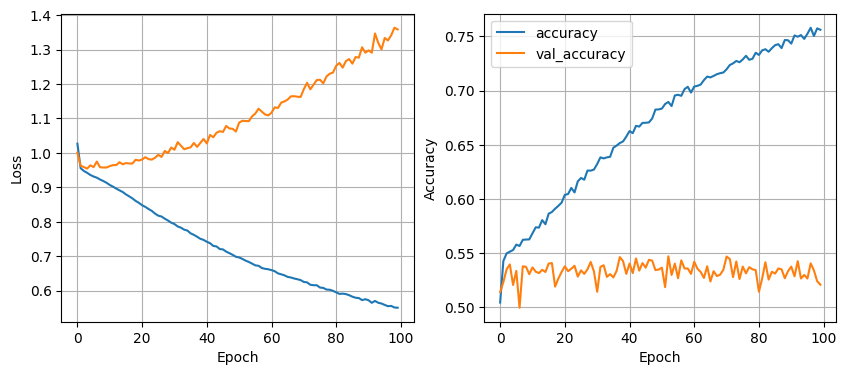

157/157 [==============================] - 0s 2ms/step - loss: 1.3473 - accuracy: 0.5246
64 nodes, dropout 0, lr 0.001, batch size 64


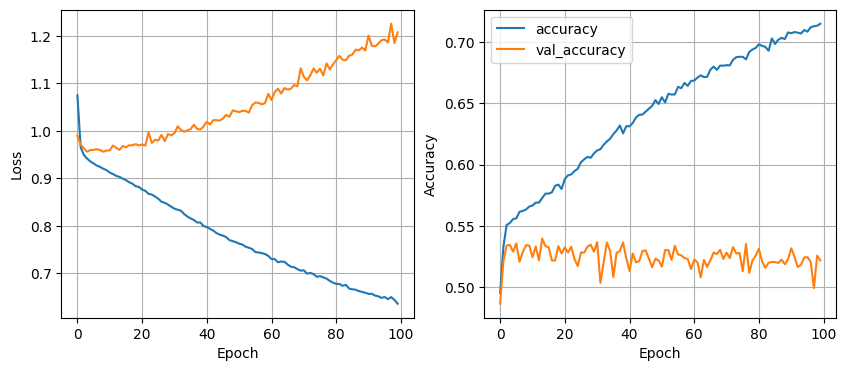

157/157 [==============================] - 0s 2ms/step - loss: 1.2294 - accuracy: 0.5296
64 nodes, dropout 0, lr 0.001, batch size 128


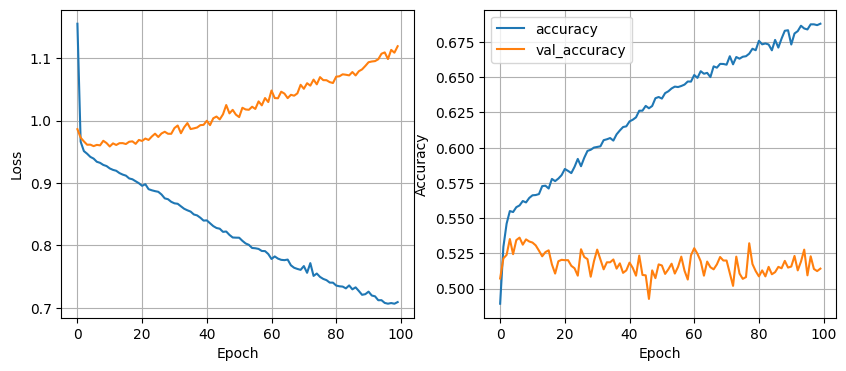

157/157 [==============================] - 0s 2ms/step - loss: 1.1295 - accuracy: 0.5194
64 nodes, dropout 0.2, lr 0.01, batch size 32


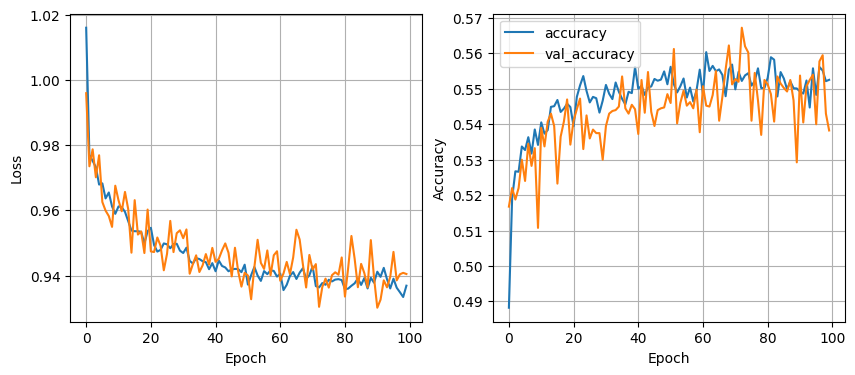

157/157 [==============================] - 0s 2ms/step - loss: 0.9461 - accuracy: 0.5466
64 nodes, dropout 0.2, lr 0.01, batch size 64


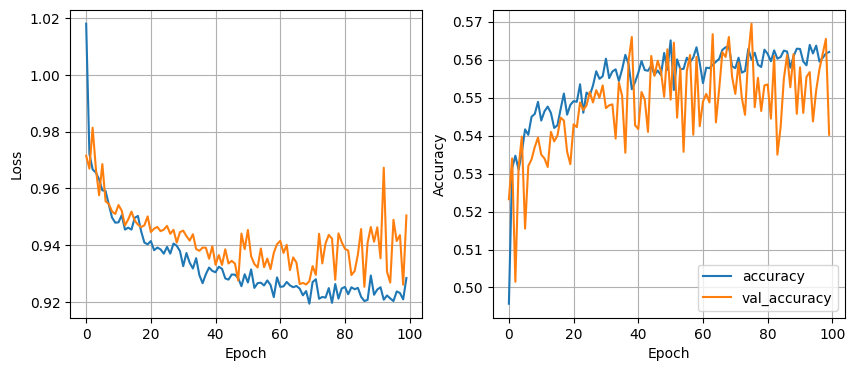

157/157 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.5546
64 nodes, dropout 0.2, lr 0.01, batch size 128


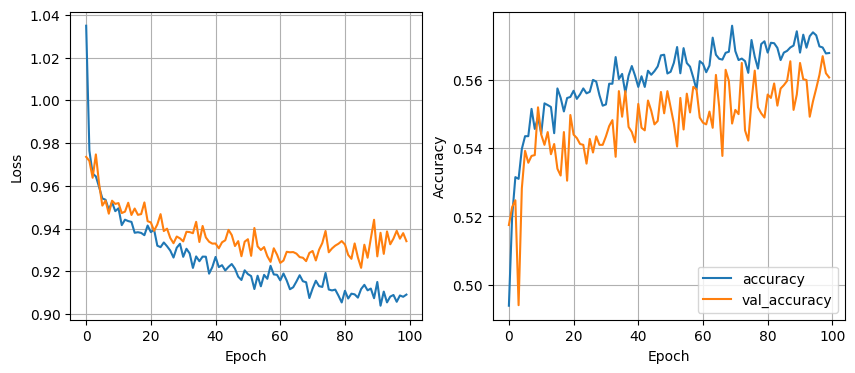

157/157 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.5594
64 nodes, dropout 0.2, lr 0.005, batch size 32


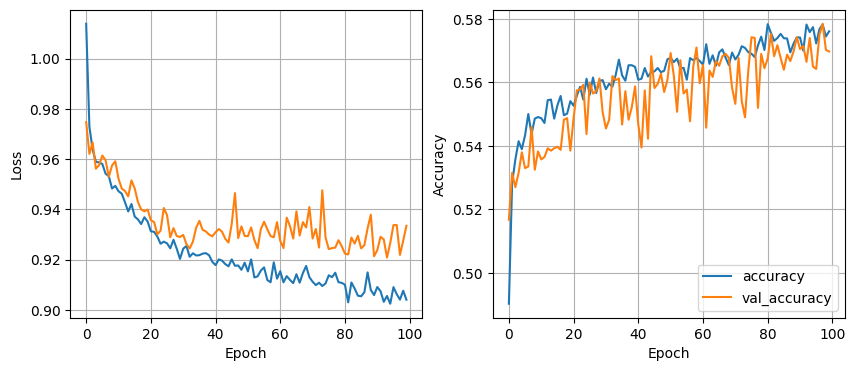

157/157 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.5544
64 nodes, dropout 0.2, lr 0.005, batch size 64


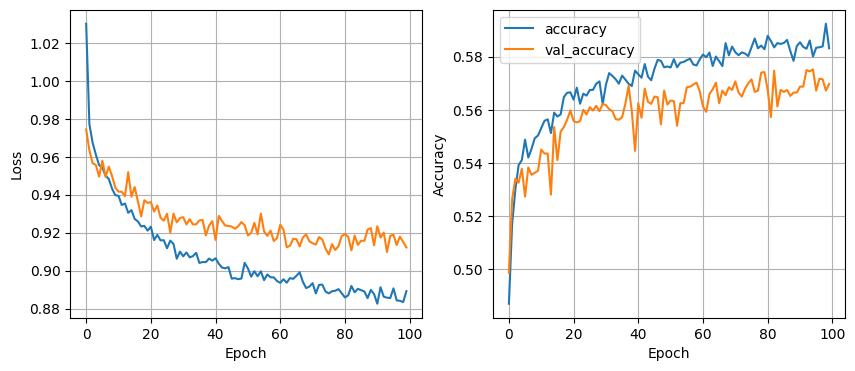

157/157 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.5730
64 nodes, dropout 0.2, lr 0.005, batch size 128


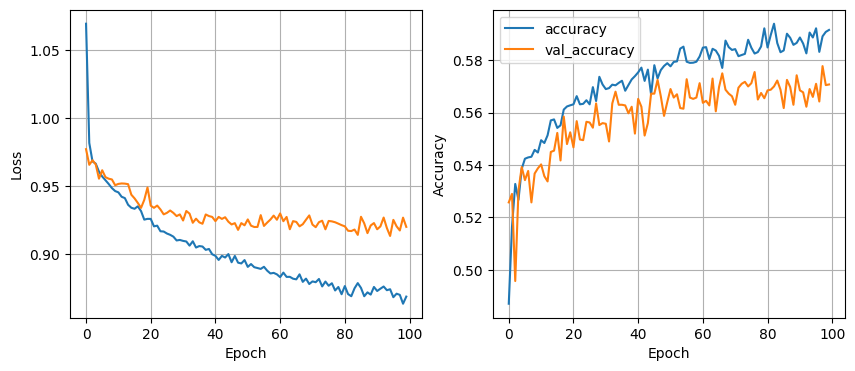

157/157 [==============================] - 0s 3ms/step - loss: 0.9207 - accuracy: 0.5758
64 nodes, dropout 0.2, lr 0.001, batch size 32


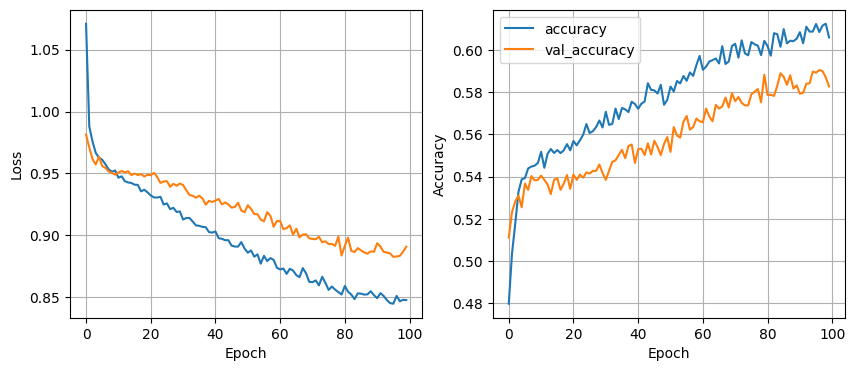

157/157 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5882
64 nodes, dropout 0.2, lr 0.001, batch size 64


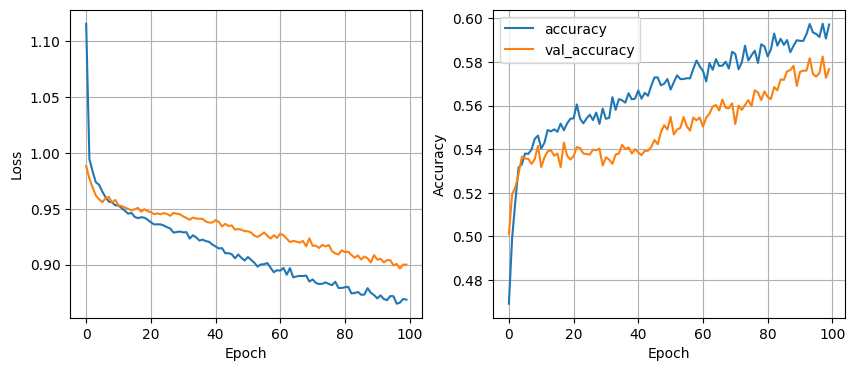

157/157 [==============================] - 0s 2ms/step - loss: 0.9068 - accuracy: 0.5708
64 nodes, dropout 0.2, lr 0.001, batch size 128


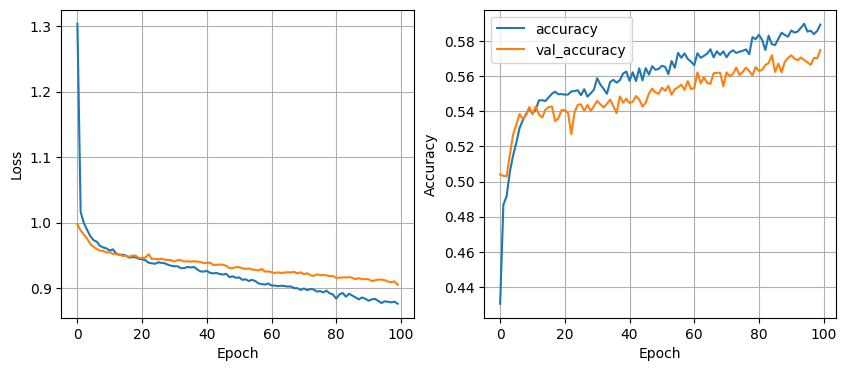

157/157 [==============================] - 0s 2ms/step - loss: 0.9092 - accuracy: 0.5802


In [81]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [82]:
y_pred = least_loss_model.predict(X_test)

31250/31250 [==============================] - 47s 2ms/step


In [83]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [84]:
# Convert to one-hot encoded form
y_pred = np.eye(10)[np.argmax(y_pred, axis=1)]
y_pred

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    501208
           1       1.00      1.00      1.00    422498
           2       1.00      1.00      1.00     47622
           3       0.99      1.00      1.00     21121
           4       0.93      0.89      0.91      3885
           5       0.87      0.48      0.62      1996
           6       0.95      0.91      0.93      1424
           7       0.91      0.37      0.53       230
           8       0.33      0.92      0.49        12
           9       0.00      0.00      0.00         3

   micro avg       1.00      1.00      1.00    999999
   macro avg       0.80      0.76      0.75    999999
weighted avg       1.00      1.00      1.00    999999
 samples avg       1.00      1.00      1.00    999999



Lowest Accuracy for 5 (flush), 8 (straight flush), 9 (royale straight flush) most likely due to the fact that these are the only poker hands that use the suit values. Model is likely to be more accustomed to focusing on the rank of the cards.